* This code demonstrates two types of load balancing techniques in Python:
  1. Round Robin Load Balancing
  2. Random Load Balancing

The program distributes incoming requests to three servers (Server1, Server2, Server3) using these strategies.


What is a Load Balancer ?
* A load balancer is a system or device that distributes incoming network traffic across multiple servers to optimize performance, ensure reliability, and prevent any single server from becoming overloaded. It enhances speed, availability, and scalability of applications by efficiently managing resource allocation.

In [ ]:
import random

# List of available servers
servers = ["Server1", "Server2", "Server3"]

In [ ]:
# Round Robin Load Balancer
class RoundRobinLoadBalancer:
    def __init__(self, servers):
        self.servers = servers
        self.current_index = 0

    def get_server(self):
        server = self.servers[self.current_index]
        self.current_index = (self.current_index + 1) % len(self.servers)
        return server

RoundRobin Load Balancer -
* How it Works?
    * The current_index starts at 0 (pointing to Server1).
    * Each time a request comes in:
        1. The server at current_index is selected.
        2. The current_index is incremented.
        3. If it reaches the last server, it loops back to the first (% len(self.servers)).

Example Execution Order:

- Request 1 → Server1
- Request 2 → Server2
- Request 3 → Server3
- Request 4 → Server1 (repeats)

* This ensures equal distribution of requests among servers.

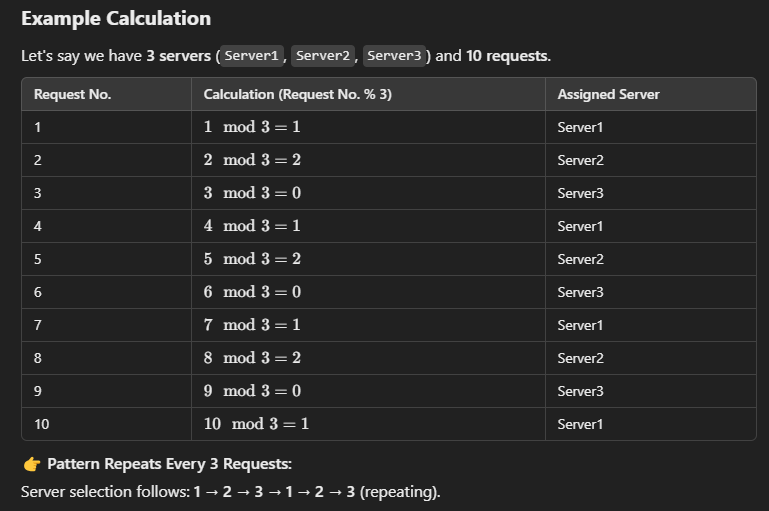

In [ ]:
# Random Load Balancer
class RandomLoadBalancer:
    def __init__(self, servers):
        self.servers = servers

    def get_server(self):
        return random.choice(self.servers)

Random Load Balancer -
* How it Works?
    * Every request is assigned to a randomly chosen server.
    * Unlike Round Robin, there is no fixed order.
    * Some servers may get more requests than others.

Example Execution Order (Random Selection):

- Request 1 → Server2
- Request 2 → Server1
- Request 3 → Server3
- Request 4 → Server3
- Request 5 → Server1

Each run gives different results.

In [ ]:
def simulate_requests(load_balancer, num_requests):
    for i in range(1, num_requests + 1):
        server = load_balancer.get_server()      # Gets a server from the load balancer
        print(f"Request {i} routed to {server}")

- This function simulates multiple incoming requests.
- It calls get_server() from the load balancer and prints which server each request is assigned to.

In [ ]:
if __name__ == "__main__":
    print("Round Robin Load Balancing:")
    round_robin_lb = RoundRobinLoadBalancer(servers)
    simulate_requests(round_robin_lb, 10)

    print("\nRandom Load Balancing:")
    random_lb = RandomLoadBalancer(servers)
    simulate_requests(random_lb, 10)

Round Robin Load Balancing:
Request 1 routed to Server1
Request 2 routed to Server2
Request 3 routed to Server3
Request 4 routed to Server1
Request 5 routed to Server2
Request 6 routed to Server3
Request 7 routed to Server1
Request 8 routed to Server2
Request 9 routed to Server3
Request 10 routed to Server1

Random Load Balancing:
Request 1 routed to Server2
Request 2 routed to Server3
Request 3 routed to Server1
Request 4 routed to Server3
Request 5 routed to Server3
Request 6 routed to Server1
Request 7 routed to Server3
Request 8 routed to Server3
Request 9 routed to Server3
Request 10 routed to Server3


- First, it prints "Round Robin Load Balancing:" and tests Round Robin with 10 requests.
- Then, it prints "Random Load Balancing:" and tests Random Selection with 10 requests.